In [8]:
#!/usr/bin/python

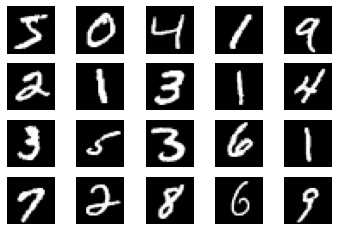

KeyboardInterrupt: 

In [6]:
import main

In [4]:
C = np.linspace(1e-1, 1, 10)
error = list(map(run_one))

NameError: name 'C' is not defined

In [7]:
run_svm_one_vs_rest_on_MNIST

NameError: name 'run_svm_one_vs_rest_on_MNIST' is not defined